In [2]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

In [56]:
timelapse = imread("../../data/CalibZAPWfixed_000154_max.tif")
timelapse.shape

(100, 235, 389)

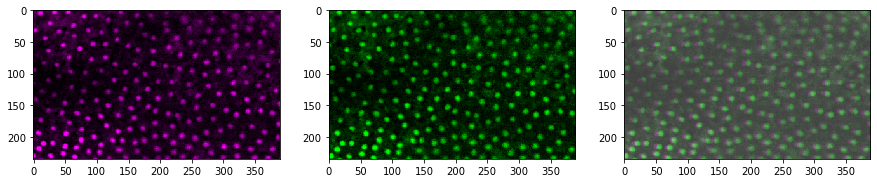

In [61]:
def show_images(image1, image2):
    from matplotlib.colors import LinearSegmentedColormap
    magentas = LinearSegmentedColormap.from_list("magentas", ((0.0,  0.0, 0.0), (1.0,  0.0, 1.0)), N=256)
    greens = LinearSegmentedColormap.from_list("greens", ((0.0,  0.0, 0.0), (0.0,  1.0, 0.0)), N=256)

    
    fix, ax = plt.subplots(1,3,figsize=(15,15))
    
    cle.imshow(image1, plot=ax[0], colormap=magentas)
    cle.imshow(image2, plot=ax[1], colormap=greens)
    cle.imshow(image1, plot=ax[2], colormap=magentas, continue_drawing=True, alpha=0.5)
    cle.imshow(image2, plot=ax[2], colormap=greens, alpha=0.5)
    
show_images(timelapse[14], timelapse[15])

In [62]:
from openpiv import tools, pyprocess, validation, filters, scaling 

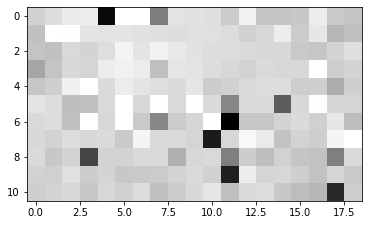

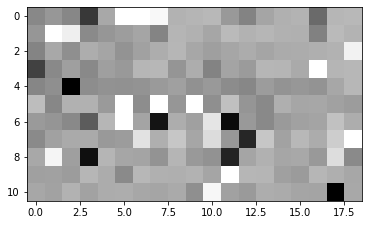

In [65]:
winsize = 20 # pixels, interrogation window size in frame A
searchsize = 25 # pixels, search in image B
overlap = 5 # pixels, 50% overlap
dt = 0.02 # sec, time interval between pulses

frame_a = timelapse[14]
frame_b = timelapse[15]


u0, v0, sig2noise = pyprocess.extended_search_area_piv(frame_a.astype(np.int32), 
                                                       frame_b.astype(np.int32), 
                                                       window_size=winsize, 
                                                       overlap=overlap, 
                                                       dt=dt, 
                                                       search_area_size=searchsize, 
                                                       sig2noise_method='peak2peak')

# u0, v0, sig2noise
cle.imshow(u0)
cle.imshow(v0)


In [66]:
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, 
                                 search_area_size=searchsize, 
                                 overlap=overlap )

x, y

(array([[ 14.5,  34.5,  54.5,  74.5,  94.5, 114.5, 134.5, 154.5, 174.5,
         194.5, 214.5, 234.5, 254.5, 274.5, 294.5, 314.5, 334.5, 354.5,
         374.5],
        [ 14.5,  34.5,  54.5,  74.5,  94.5, 114.5, 134.5, 154.5, 174.5,
         194.5, 214.5, 234.5, 254.5, 274.5, 294.5, 314.5, 334.5, 354.5,
         374.5],
        [ 14.5,  34.5,  54.5,  74.5,  94.5, 114.5, 134.5, 154.5, 174.5,
         194.5, 214.5, 234.5, 254.5, 274.5, 294.5, 314.5, 334.5, 354.5,
         374.5],
        [ 14.5,  34.5,  54.5,  74.5,  94.5, 114.5, 134.5, 154.5, 174.5,
         194.5, 214.5, 234.5, 254.5, 274.5, 294.5, 314.5, 334.5, 354.5,
         374.5],
        [ 14.5,  34.5,  54.5,  74.5,  94.5, 114.5, 134.5, 154.5, 174.5,
         194.5, 214.5, 234.5, 254.5, 274.5, 294.5, 314.5, 334.5, 354.5,
         374.5],
        [ 14.5,  34.5,  54.5,  74.5,  94.5, 114.5, 134.5, 154.5, 174.5,
         194.5, 214.5, 234.5, 254.5, 274.5, 294.5, 314.5, 334.5, 354.5,
         374.5],
        [ 14.5,  34.5,  54.5,  74.

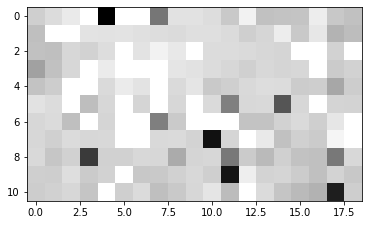

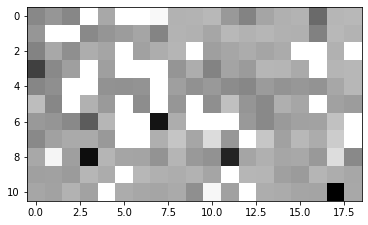

In [67]:
u1, v1, mask = validation.sig2noise_val( u0, v0, 
                                        sig2noise, 
                                        threshold = 1.05 )

cle.imshow(u1)
cle.imshow(v1)


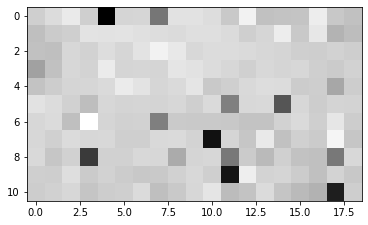

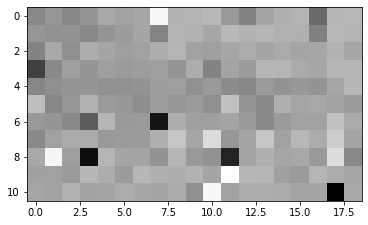

In [69]:
u2, v2 = filters.replace_outliers( u1, v1, 
                                  method='localmean', 
                                  max_iter=3, 
                                  kernel_size=3)

cle.imshow(u2)
cle.imshow(v2)